**Table of Content:**

- [Import Libraries](#Import_Libraries)
- [1. Probability disstributions](#1)
- [2. Normal (Gaussian) Distribution](#Normal_Distribution)
  
    - [2.1 Standard Normal Distribution](#2.1)
    - [2.2 Z Score](#2.2)
    - [2.3 Empirical Rule](#2.3)
- [3. Working with normal Distribution](#3)
    - [Detection Outlier using normal distribution](#3.1)

### Import Libraries

In [5]:
import pandas as pd # For performing data operations, cleaning, and descriptive statistics,...
import matplotlib.pyplot as plt # data visualzation 
import seaborn as sns ## data visualization advance features easy to plot than matplotlib
import numpy as np ## For array generation 
from scipy import stats ## For statistical analysis, such as calculating Z-scores
from scipy.stats import norm


import warnings ## To suppress warning messages that could clutter the output

warnings.filterwarnings('ignore')

### 1. Probability disstributions

1. **Discrete random variables** can take a finite, countable number of values. For instance, the result of a dice roll can be 1, 2, 3, 4, 5 or 6.

2. **Continuous random variables** can take an infinite number of values. Examples include measurements such as temperature, height and weight.

### 2. Normal Distribution


A normal distribution is a symmetrical bell-shaped curve, defined by its mean ($\mu$) and standard deviation ($\sigma$)

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\ \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\ \right)\ \quad  x  \in  (- \infty, \infty)$

$f(x) = probability\ density\ function$

$\sigma = standard\ deviation$

$\mu = mean$

#### 2.1 standard normal distribution


Properties of a standard normal distribution:
+ The standard normal distribution is a normal distribution with a mean value of 0 and a standard deviation as 1.
+ Any normal distribution can be converted into standard normal distribution using the following formula:

$$z = \frac {x-\mu}{\sigma}$$  

where $\mu$ and $\sigma$ are the mean and variance of the
original normal distribution.


In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G7/main/Part%203%20Probability%20Distribution/data_probability.csv')

In [9]:
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252,276,Placed,"$111,000"
1,2,Business,62.1,92.8,No,423,410,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101,119,Placed,"$107,000"
3,4,Engineering,75.1,80.7,No,288,334,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248,252,Not Placed,NaN


In [67]:
n_s = df['Undergrad Degree'].value_counts().sum()

In [73]:
Probab_dis = df['Undergrad Degree'].value_counts()/n_s

In [87]:
fig, ax = plt.subplots(figsize =  (12, 4))
sns.barplot(x = Probab_dis, y = Probab_dis.index,color= 'r');

<Axes: xlabel='count', ylabel='Undergrad Degree'>

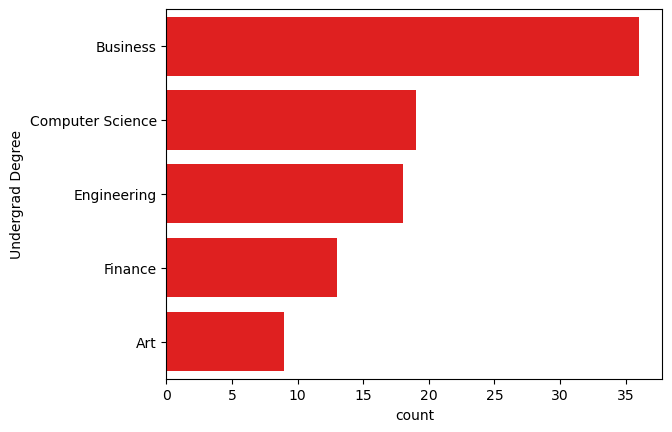

In [57]:
sns.countplot(y = df['Undergrad Degree'], color= 'r')

In [29]:
n_s = df['Undergrad Degree'].value_counts().sum()

In [43]:
P_business = Undergrad['Business']/n_s

In [45]:
P_business

0.37894736842105264

In [33]:
Undergrad = df['Undergrad Degree'].value_counts()

In [49]:
Undergrad/n_s

1.0

In [41]:
Undergrad['Finance']

13

In [37]:
Undergrad['Business']

36

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              95 non-null     int64  
 1   Undergrad Degree        95 non-null     object 
 2   Undergrad Grade         95 non-null     float64
 3   MBA Grade               95 non-null     float64
 4   Work Experience         95 non-null     object 
 5   Employability (Before)  95 non-null     int64  
 6   Employability (After)   95 non-null     int64  
 7   Status                  95 non-null     object 
 8   Annual Salary           53 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.8+ KB


In [15]:
df['MBA Grade'].describe()

count    95.000000
mean     80.169474
std       6.170780
min      62.600000
25%      76.050000
50%      80.200000
75%      84.650000
max      96.100000
Name: MBA Grade, dtype: float64

In [89]:
df['MBA Grade']

0     90.2
1     92.8
2     68.7
3     80.7
4     74.9
      ... 
90    77.9
91    86.1
92    89.9
93    83.1
94    82.6
Name: MBA Grade, Length: 95, dtype: float64

In [105]:
np.arange(60, 101, 5)

array([ 60,  65,  70,  75,  80,  85,  90,  95, 100])

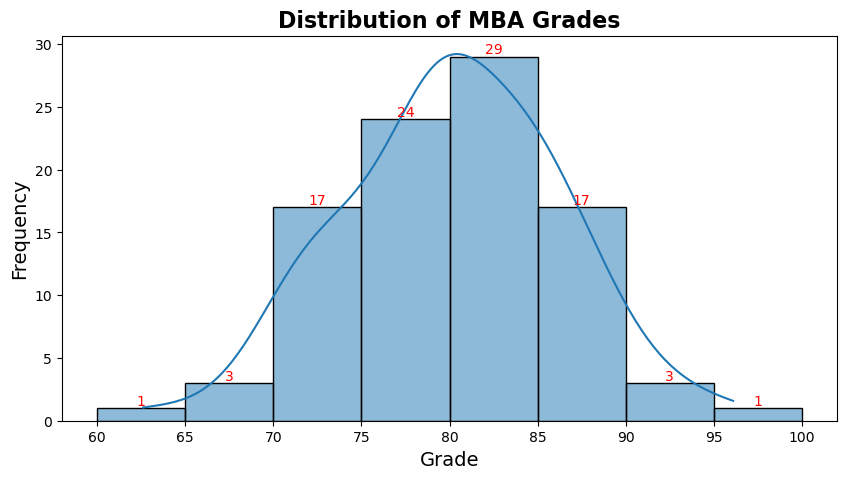

In [125]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot( x = df['MBA Grade'],kde=True, bins =np.arange(60, 101, 5) )
ax.bar_label(ax.containers[1], color = 'r')
ax.set_xticks(np.arange(60, 101, 5))
ax.set_title('Distribution of MBA Grades', fontsize=16, fontweight='bold')
ax.set_xlabel('Grade', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
# fig.savefig()
plt.show()

In [127]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G7/main/Dataset/0.%20education_districtwise.csv')

In [143]:
df1.head()

In [149]:
df1.info()

In [137]:
df1.dropna(inplace=True)

In [167]:
df1['OVERALL_LI'].describe()

count    634.000000
mean      73.395189
std       10.098460
min       37.220000
25%       66.437500
50%       73.490000
75%       80.815000
max       98.760000
Name: OVERALL_LI, dtype: float64

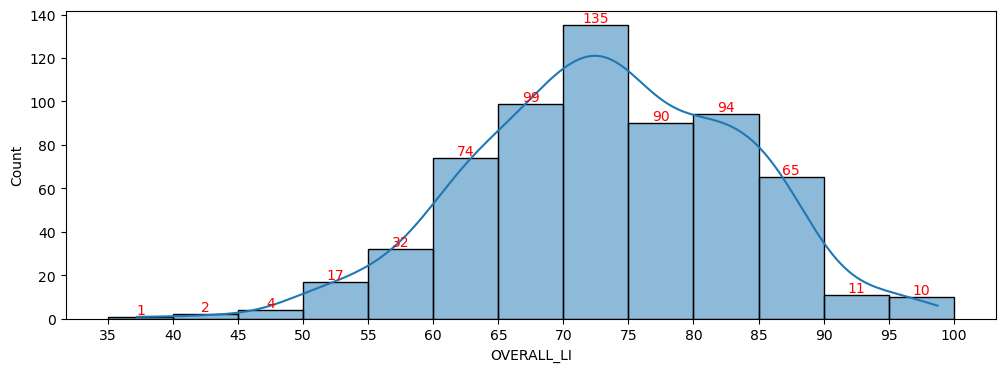

In [165]:
fig, ax =plt.subplots(figsize = (12, 4))
sns.histplot(x = df1['OVERALL_LI'], bins = np.arange(35, 101,5), kde = True)
ax.bar_label(ax.containers[1], color = 'r')
ax.set_xticks(np.arange(35, 101,5));

In [121]:
df['MBA Grade'].describe()

count    95.000000
mean     80.169474
std       6.170780
min      62.600000
25%      76.050000
50%      80.200000
75%      84.650000
max      96.100000
Name: MBA Grade, dtype: float64

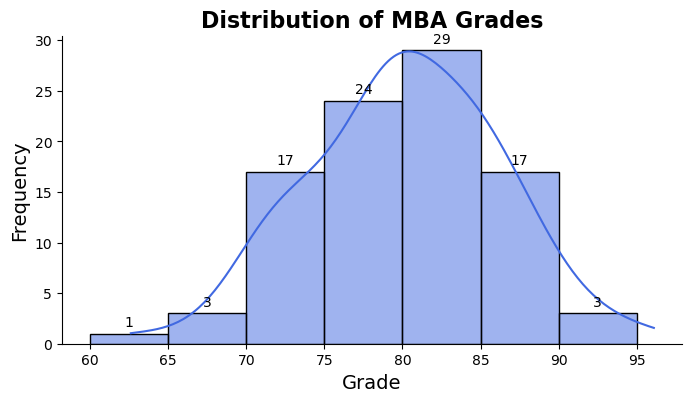

In [13]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.histplot(x=df['MBA Grade'], bins=np.arange(60, 100, 5), 
             kde=True, color='royalblue', edgecolor='black')
ax.set_xticks(np.arange(60, 100, 5))
ax.set_title('Distribution of MBA Grades', fontsize=16, fontweight='bold')
ax.set_xlabel('Grade', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)
sns.despine()

In [28]:
df['MBA Grade'].describe()

count    95.000000
mean     80.169474
std       6.170780
min      62.600000
25%      76.050000
50%      80.200000
75%      84.650000
max      96.100000
Name: MBA Grade, dtype: float64

#### 2.2 Z Score

**Reference**: [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

In [169]:
from scipy import stats 

In [173]:
df['MBA Grade'].describe()

count    95.000000
mean     80.169474
std       6.170780
min      62.600000
25%      76.050000
50%      80.200000
75%      84.650000
max      96.100000
Name: MBA Grade, dtype: float64

In [179]:
-5*10**(-3)

-0.005

In [177]:
-5.346600e-16

-5.3466e-16

In [175]:
stats.zscore(df['MBA Grade']).describe()

count    9.500000e+01
mean    -5.346600e-16
std      1.005305e+00
min     -2.862309e+00
25%     -6.711190e-01
50%      4.973157e-03
75%      7.299395e-01
max      2.595302e+00
Name: MBA Grade, dtype: float64

In [193]:
df1['OVERALL_LI'].describe()

count    634.000000
mean      73.395189
std       10.098460
min       37.220000
25%       66.437500
50%       73.490000
75%       80.815000
max       98.760000
Name: OVERALL_LI, dtype: float64

In [187]:
df1['Overall_Li_z_score'] = stats.zscore(df1['OVERALL_LI'])

In [191]:
df1[(df1['Overall_Li_z_score']<-3) | (df1['Overall_Li_z_score']>3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Overall_Li_z_score
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


#### 2.3 Empirical Rule

In [196]:
mean = df1['OVERALL_LI'].mean()
std = df1['OVERALL_LI'].std(ddof=0)

In [274]:
df.columns

Index(['Student ID', 'Undergrad Degree', 'Undergrad Grade', 'MBA Grade',
       'Work Experience', 'Employability (Before)', 'Employability (After)',
       'Status', 'Annual Salary'],
      dtype='object')

In [276]:
def empirical_rule(df1,column ):
    
    mean = df1[column].mean()
    std = df1[column].std(ddof=0)
    num_row = df1.shape[0]  
    
    within_one_std = df1[(df1[column]>=(mean-std)) & (df1[column]<=(mean+std))]
    within_two_std = df1[(df1[column]>=(mean-2*std)) & (df1[column]<=(mean+2*std))]
    within_three_std = df1[(df1[column]>=(mean-3*std)) & (df1[column]<=(mean+3*std))]
    
    one_std = within_one_std.shape[0]/num_row
    two_std = within_two_std.shape[0]/num_row
    three_std = within_three_std.shape[0]/num_row
    
    data_rule = {'Empirical Rule':['within_one_std','within_two_std','within_three_std'],
                 
                'Empirical':[f'{round(one_std*100, 2)}%',
                             f'{round(two_std*100,2)}%',
                             f'{round(three_std*100,2)}%'],
                 
                 'Values':[f'{round((mean-std), 2)}-{round((mean+std),2)}',
                           f'{round((mean-2*std),2)}-{round((mean+2*std),2)}',
                          f'{round((mean-3*std),2)}-{round((mean+3*std),2)}']}
    data_rule = pd.DataFrame(data_rule)
    
    return data_rule 

In [280]:
df1.columns

Index(['DISTNAME', 'STATNAME', 'BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT',
       'OVERALL_LI', 'Overall_Li_z_score'],
      dtype='object')

In [290]:
empirical_rule(df1 = df,column='MBA Grade' )

,Empirical Rule,Empirical,Values
0,within_one_std,68.42%,74.03-86.31
1,within_two_std,94.74%,67.89-92.45
2,within_three_std,100.0%,61.75-98.58


In [282]:
empirical_rule(df1, column='OVERALL_LI')

,Empirical Rule,Empirical,Values
0,within_one_std,66.4%,63.3-83.49
1,within_two_std,95.43%,53.21-93.58
2,within_three_std,99.68%,43.12-103.67


In [214]:
within_two_std.shape[0]/df1.shape[0]

0.9542586750788643

In [216]:
within_three_std.shape[0]/df1.shape[0]

0.9968454258675079

In [206]:
df1[(df1['OVERALL_LI']>=(mean-std)) & (df1['OVERALL_LI']<=(mean+std))].shape[0]/len(df1)

0.6640378548895899

<p align="center"> 
  <img width="650" height="350" src="https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png"> 
</p>

##### Instructions

1. **Filter Data Within One Standard Deviation**:
   - Extract the subset of the data that falls within one standard deviation of the mean from ($\mu - \sigma$) to ($\mu + \sigma$).
   - Calculate and report the probability of a data point falling within this range.

2. **Filter Data Within Two Standard Deviations**:
   - Extract the subset of data that falls within two standard deviations of the mean (from ($\mu - 2*\sigma$) to ($\mu + 2*\sigma$).
   - Calculate and report the probability of a data point falling within this range.

3. **Filter Data Within Three Standard Deviations**:
   - Extract the subset of data that falls within three standard deviations of the mean (from ($\mu - 3*\sigma$) to ($\mu + 3*\sigma$).
   - Calculate and report the probability of a data point falling within this range.

**Notes**:
- Ensure that your calculations include only the filtered data points within each specified range.
- Provide both the number of data points and the probability for each range, expressed as a percentage of the total dataset.

**Hints**:
- The probability can be calculated by dividing the count of data points within the specified range by the total count of data points in the dataset.
- Use statistical functions like `mean()` and `std()` to determine the mean and standard deviation values.


### 3. Detection Outlier using normal distribution (empircal rule)

In [224]:
def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df > upper_end) | (df < lower_end)]
    return outliers

In [226]:
df1[(df1['Overall_Li_z_score']<-3) | (df1['Overall_Li_z_score']>3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Overall_Li_z_score
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


In [220]:
outlier_detection(df1['OVERALL_LI'])

434    42.67
469    44.45
494    37.22
Name: OVERALL_LI, dtype: float64

In [39]:
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

#### find outliers

Our analysis gives us important information to share. The **government** may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy. 